In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('./anomaly_data.csv')
df_test[' timestamp'] = pd.to_datetime(df_test[' timestamp'])

In [3]:
#cut after 500 row
df_test = df_test[:700]

In [4]:
df_test

,cpu_used,memory_used,timestamp
0,44.257902,499971.901834,2023-12-04 22:00:00+00:00
1,57.995132,499804.705626,2023-12-04 22:05:00+00:00
2,57.052537,499968.716084,2023-12-04 22:10:00+00:00
3,46.925357,500108.595365,2023-12-04 22:15:00+00:00
4,52.596490,500080.930637,2023-12-04 22:20:00+00:00
...,...,...,...
695,46.306867,501083.916740,2023-12-07 07:55:00+00:00
696,51.995797,500100.177288,2023-12-07 08:00:00+00:00
697,59.845604,500026.777131,2023-12-07 08:05:00+00:00
698,46.836160,499896.756739,2023-12-07 08:10:00+00:00


In [5]:
cpu_used = df_test[['cpu_used', ' timestamp']]
memory_used = df_test[[' memory_used', ' timestamp']]

In [6]:
def create_lag(df, col, num_lags=1):
    for i in range(1, num_lags+1):
        df['lag_{}'.format(i)] = df[col].shift(i)
      
    df = df.dropna()
    return df

In [7]:
cpu_used = create_lag(cpu_used, 'cpu_used', 2)
memory_used = create_lag(memory_used, ' memory_used', 2)

In [8]:
X_cpu = cpu_used[['cpu_used', 'lag_1', 'lag_2']]
X_memory = memory_used[[' memory_used', 'lag_1', 'lag_2']]

In [9]:
X_cpu['cpu_used'] = (X_cpu['cpu_used']/100).astype(float)
X_cpu['lag_1'] = (X_cpu['lag_1']/100).astype(float)
X_cpu['lag_2'] = (X_cpu['lag_2']/100).astype(float)

X_memory[' memory_used'] = (X_memory[' memory_used']/1000000).astype(float)
X_memory['lag_1'] = (X_memory['lag_1']/1000000).astype(float)
X_memory['lag_2'] = (X_memory['lag_2']/1000000).astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_19052\195105115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cpu['cpu_used'] = (X_cpu['cpu_used']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_19052\195105115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cpu['lag_1'] = (X_cpu['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_19052\195105115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [10]:
X_memory

,memory_used,lag_1,lag_2
2,0.499969,0.499805,0.499972
3,0.500109,0.499969,0.499805
4,0.500081,0.500109,0.499969
5,0.499981,0.500081,0.500109
6,0.499825,0.499981,0.500081
...,...,...,...
695,0.501084,0.499995,0.499939
696,0.500100,0.501084,0.499995
697,0.500027,0.500100,0.501084
698,0.499897,0.500027,0.500100


In [ ]:
cpu_model = tf.keras.models.load_model('./cpu_model_2.h5')

In [ ]:
cpu_pred = cpu_model.predict(X_cpu.to_numpy())

22/22 [==============================] - 0s 1ms/step


In [ ]:
cpu_used['prediction'] = cpu_pred
cpu_used['prediction'] = cpu_used['prediction'].apply(lambda x: 1 if x > 0.5 else 0)

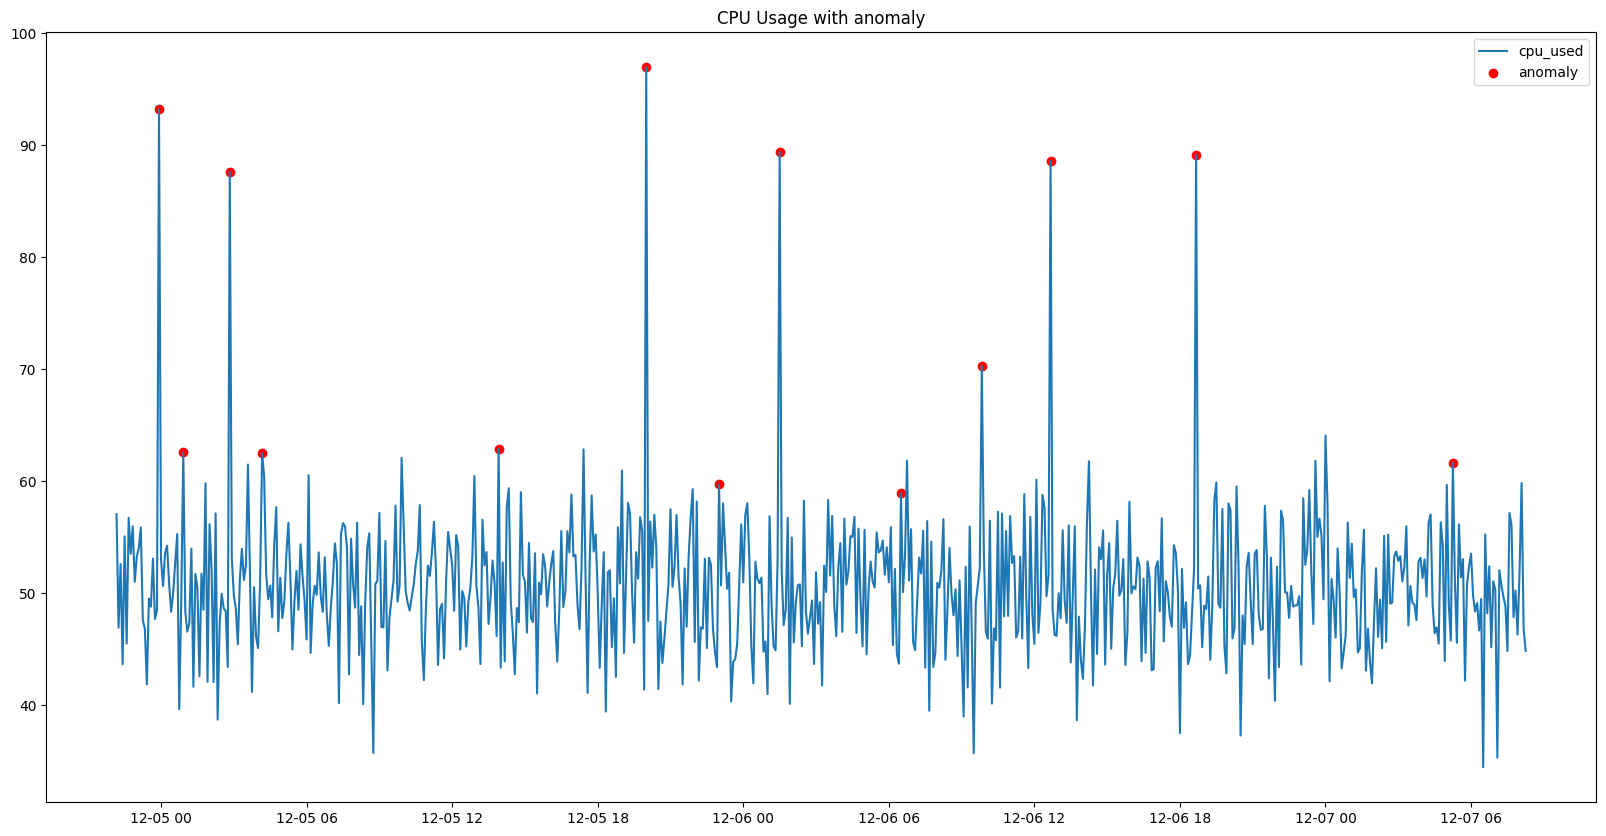

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(cpu_used[' timestamp'], cpu_used['cpu_used'], label='cpu_used')
plt.scatter(cpu_used[cpu_used['prediction'] == 1][' timestamp'], cpu_used[cpu_used['prediction'] == 1]['cpu_used'], color='red', label='anomaly')
plt.legend()
plt.title('CPU Usage with anomaly')
# plt.xlim(pd.Timestamp('2023-12-05'), pd.Timestamp('2023-12-07'))
plt.show()


In [ ]:
len(cpu_used[cpu_used['prediction'] == 1])

13